**Solo Business Analysis - Jack Keaveny**



Claim 1: “The introduction of new systems in 2023 has improved our sales and profits significantly.”

Claim 2: “2023 e-marketing campaign has boosted Technology sales and profits over all other categories.”

Claim 3: “Office supplies are our most profitable product category."

**Step 1: Loading in the data**

In [ ]:
import pandas as pd

df_2122 = pd.read_csv('acme_2021_2022.csv', decimal = ',', parse_dates = ['Order Date', 'Ship Date'], dayfirst = False)

# Making sure the dates are correctly formatted and adding a column for year
df_2122['Year'] = pd.DatetimeIndex(df_2122['Order Date']).year

df_2122.describe()

,Order Date,Ship Date,Postal Code,Region,Sales,Quantity,Discount,Profit,Year
count,4084,4084,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000
mean,2022-02-16 10:54:03.878550272,2022-02-14 13:52:49.833496576,54803.004652,1.521058,264.292752,3.797992,0.156795,33.396192,2021.515426
min,2021-01-04 00:00:00,2021-01-03 00:00:00,1040.000000,0.000000,0.890000,1.000000,0.000000,-3787.040000,2021.000000
25%,2021-09-09 00:00:00,2021-09-04 00:00:00,22204.000000,0.000000,18.970000,2.000000,0.000000,2.010000,2021.000000
50%,2022-01-28 00:00:00,2022-01-18 00:00:00,55407.000000,1.000000,62.785000,3.000000,0.200000,10.160000,2022.000000
75%,2022-09-11 00:00:00,2022-09-13 00:00:00,90004.000000,3.000000,249.667500,5.000000,0.200000,37.960000,2022.000000
max,2022-12-31 00:00:00,2023-01-02 00:00:00,99301.000000,3.000000,23702.490000,14.000000,0.800000,4736.980000,2022.000000
std,NaN,NaN,32054.651570,1.206683,686.689294,2.240190,0.207308,234.057220,0.499823


In [ ]:
df_2324 = pd.read_json('acme_2023_2024.json', convert_dates = ['Order Date', 'Ship Date'])

# Adding a column for year
df_2324['Year'] = pd.DatetimeIndex(df_2324['Order Date']).year

df_2324.describe()


,Order Date,Ship Date,Postal Code,Region,Sales,Quantity,Discount,Profit,Year
count,4220,4220,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000
mean,2023-11-21 16:49:42.369668352,2023-11-20 08:41:03.696682496,55479.684597,1.512085,368.803825,3.781043,0.155915,63.088597,2023.388152
min,2023-01-02 00:00:00,2022-04-01 00:00:00,1752.000000,0.000000,0.000000,1.000000,0.000000,-6619.780000,2023.000000
25%,2023-06-30 00:00:00,2023-06-28 00:00:00,24031.250000,0.000000,27.442500,2.000000,0.000000,1.847500,2023.000000
50%,2023-11-16 00:00:00,2023-11-15 00:00:00,58754.000000,1.000000,84.150000,3.000000,0.200000,8.860000,2023.000000
75%,2024-04-14 06:00:00,2024-04-16 06:00:00,90032.000000,3.000000,328.765000,5.000000,0.200000,29.660000,2024.000000
max,2024-12-08 00:00:00,2024-12-08 00:00:00,99207.000000,3.000000,43507.200000,14.000000,0.800000,91585.940000,2024.000000
std,NaN,NaN,31932.498610,1.204635,1189.961510,2.193079,0.206966,1502.673596,0.487387


How can the max profit be 91585.94 if the max sale is only 43507.20? This doesn't make sense and we will need to fix this after a bit more exploration.

**Step 2: Analyzing the data**

In [ ]:
# Checking the data formats
df_2122['Order Date'][0:2]
df_2324['Order Date'][0:2]

,Order Date
0,2023-02-01
1,2023-02-01


In [ ]:
# Concatenating a merged dataset with all years and making separate datasets for each year

df_total = pd.concat([df_2122, df_2324], ignore_index = True)


df_21 = df_total[df_total["Year"]==2021]
df_22 = df_total[df_total["Year"]==2022]
df_23 = df_total[df_total["Year"]==2023]
df_24 = df_total[df_total["Year"]==2024]

df_total.groupby("Year").describe()


Order Date                                                      \
          count                           mean                  min   
Year                                                                  
2021       1979  2021-08-11 12:07:38.413339904  2021-01-04 00:00:00   
2022       2105  2022-08-13 02:14:04.845605632  2022-01-02 00:00:00   
2023       2582  2023-07-27 02:55:40.666150400  2023-01-02 00:00:00   
2024       1638  2024-05-25 01:01:32.307692288  2024-01-02 00:00:00   

                                                                     \
                      25%                  50%                  75%   
Year                                                                  
2021  2021-05-22 00:00:00  2021-09-07 00:00:00  2021-11-10 00:00:00   
2022  2022-05-26 00:00:00  2022-09-06 00:00:00  2022-11-13 00:00:00   
2023  2023-05-10 00:00:00  2023-07-30 12:00:00  2023-10-23 00:00:00   
2024  2024-03-20 00:00:00  2024-05-20 00:00:00  2024-07-28 00:00:00   

                               Ship Date                                 ...  \
                      max  std     count                           mean  ...   
Year                                                                     ...   
2021  2021-12-31 00:00:00  NaN      1979  2021-08-08 03:22:17.038908672  ...   
2022  2022-12-31 00:00:00  NaN      2105  2022-08-12 14:48:37.624703232  ...   
2023  2023-12-31 00:00:00  NaN      2582  2023-07-24 16:52:14.314484736  ...   
2024  2024-12-08 00:00:00  NaN      1638  2024-05-25 09:43:44.175824128  ...   

     Discount            Profit                                             \
          max       std   count       mean      min    25%     50%     75%   
Year                                                                         
2021      0.8  0.206097  1979.0  24.863936 -3787.04  1.670   8.180  28.645   
2022      0.8  0.208465  2105.0  41.417729 -3695.99  2.350  13.060  48.180   
2023      0.8  0.204061  2582.0  70.495387 -6619.78  1.880   8.825  29.210   
2024      0.8  0.211509  1638.0  51.413181 -3501.98  1.805   8.910  30.360   

                             
           max          std  
Year                         
2021   4736.98   203.485108  
2022   4448.46   259.328928  
2023  91585.94  1830.397802  
2024  27980.10   732.768162  

[4 rows x 64 columns]

Now, we will start creating visuals to gain a better understanding of the data we're working with. We must be sure to look for any irregularities within our raw data and clean them before we can properly answer the questions.

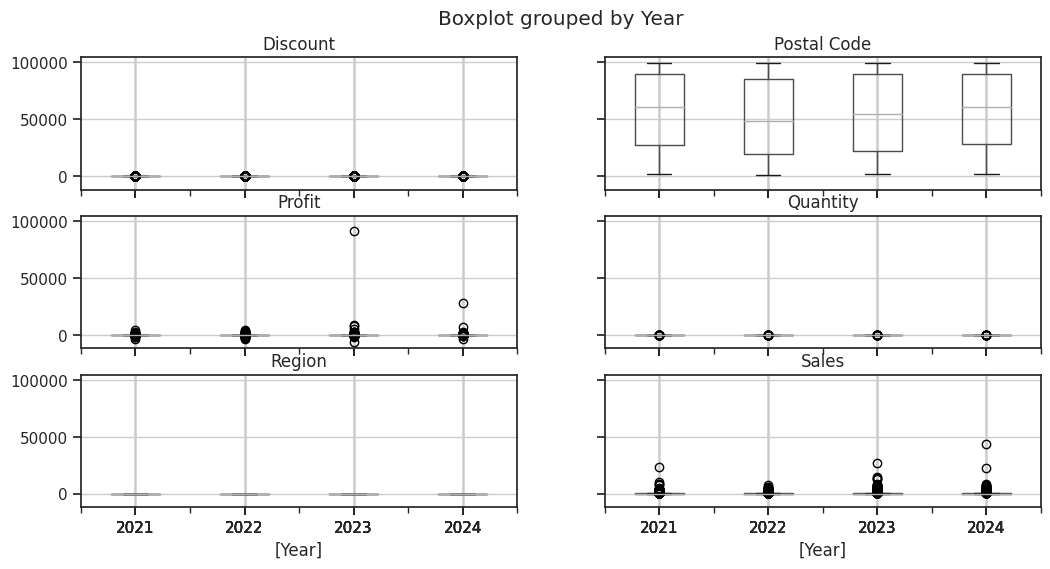

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style = "ticks", color_codes = True)

# Exploring data and creating visuals to answer the primary 3 questions

df_total.boxplot(by = 'Year', figsize=(12,6))
plt.show()

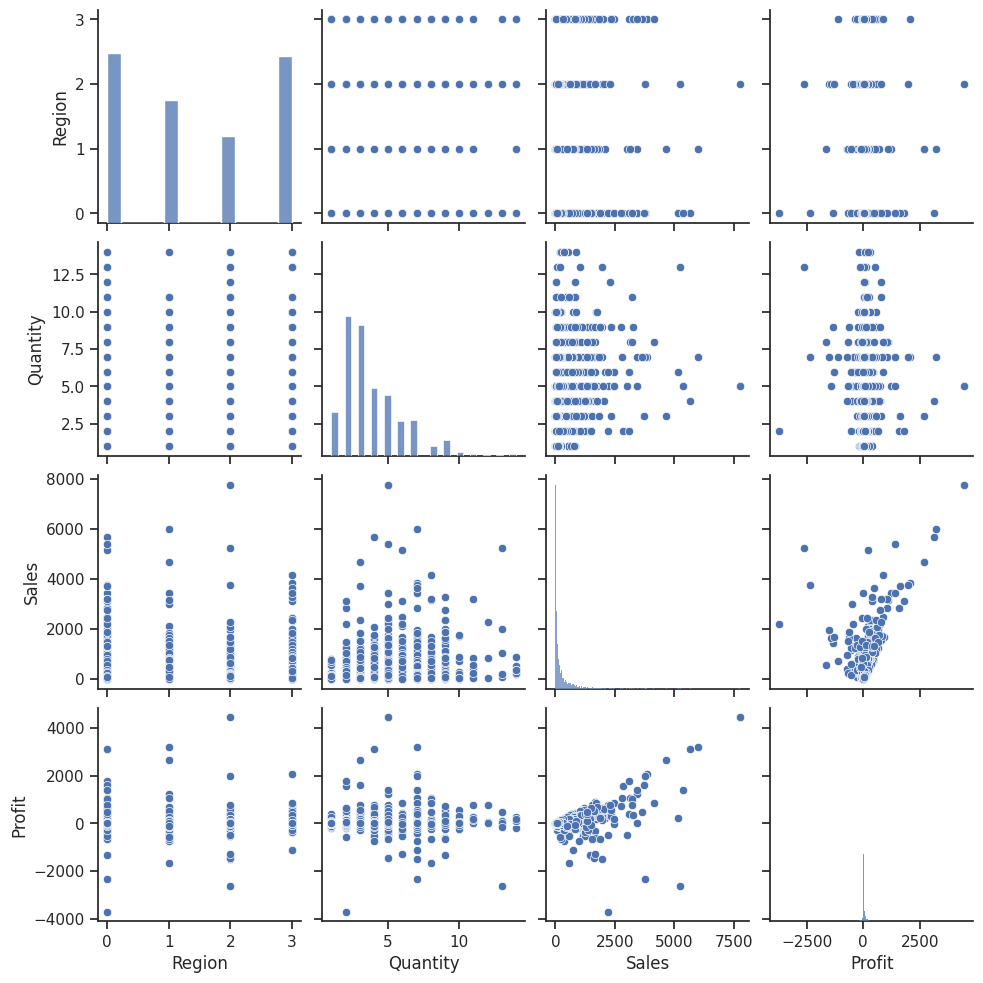

In [ ]:
# Another visual, going through relationships between variables in 2022
cols_for_pairplot = ['Region', 'Quantity', 'Sales', 'Profit']
df_pairplot = df_22[cols_for_pairplot]

sns.pairplot(df_pairplot)

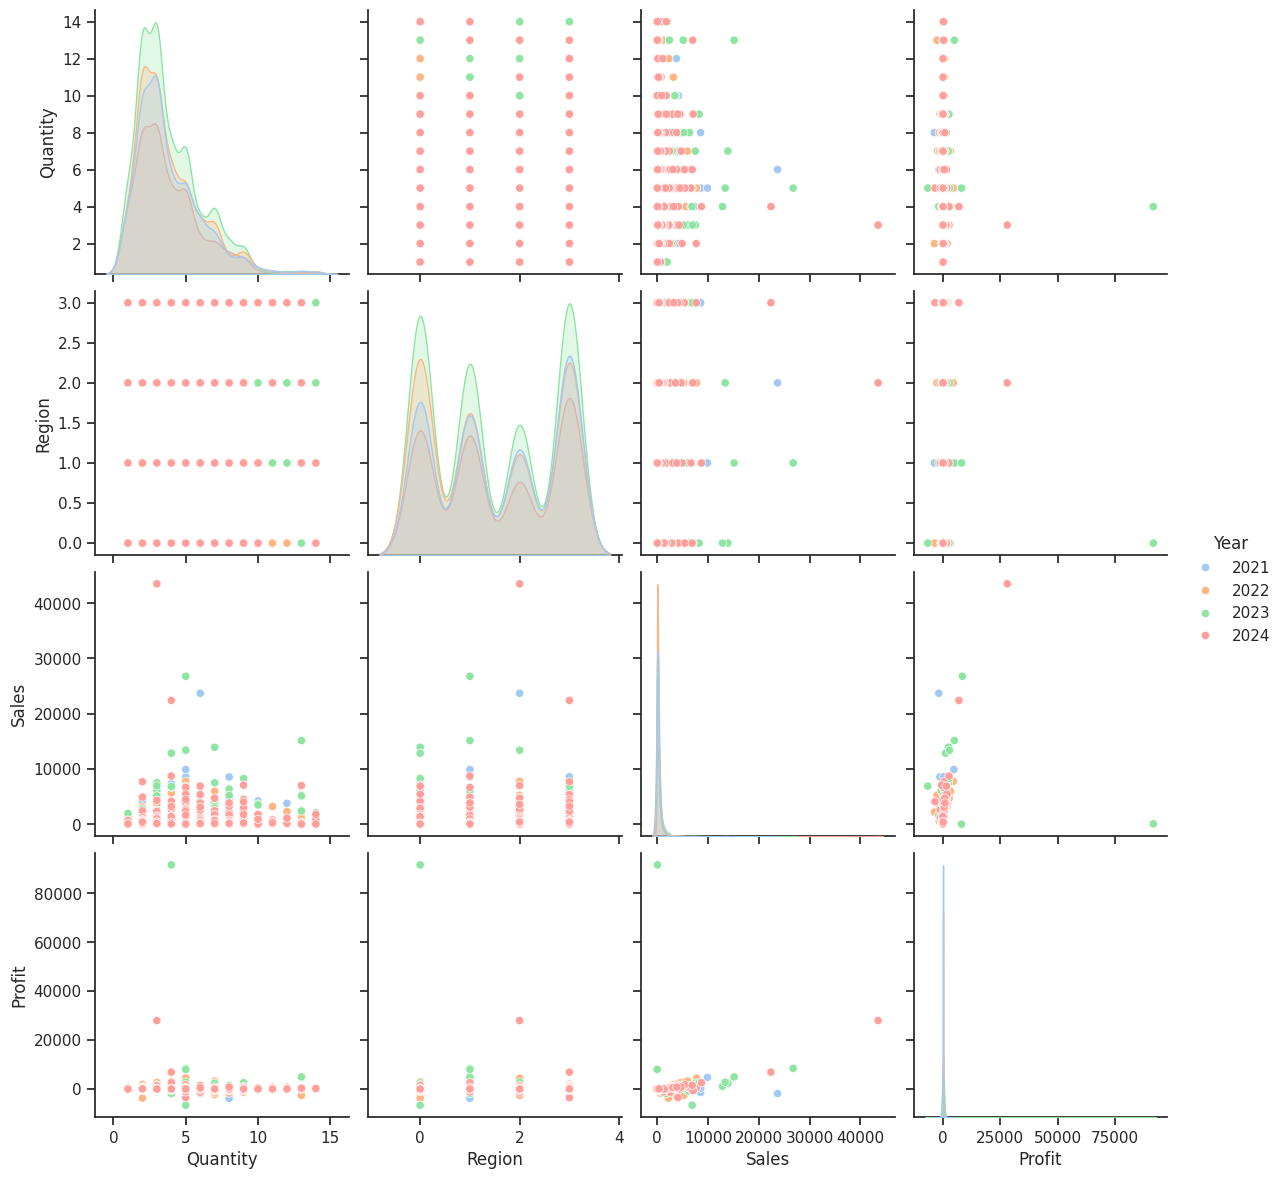

In [ ]:
# Color coded by year, easier to read and interpret
cols_for_pairplot = ["Quantity", "Region", "Sales", "Profit", "Year"]

df_pairplot = df_total[cols_for_pairplot]

sns.pairplot(df_pairplot, vars = df_pairplot.columns[:-1], hue = "Year",  height = 3, palette = "pastel")
plt.show()

We can clearly see from some of these graphs that there are some massive outliers in the sales and profit categories, specifically in the years 2023 and 2024.

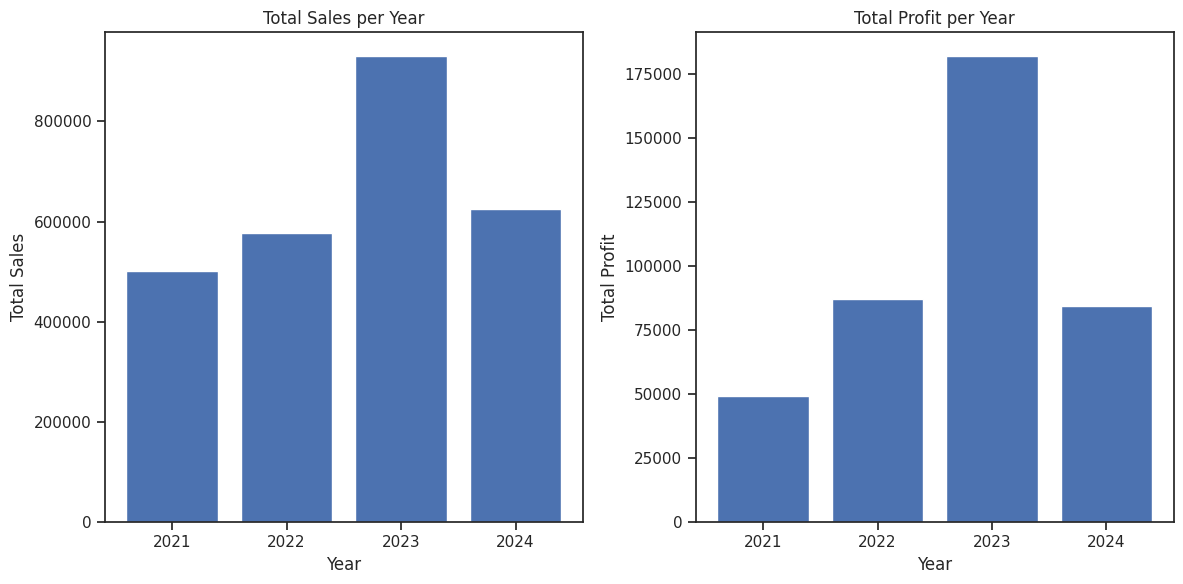

In [ ]:
#Creating bar graph visuals that show sales and profit totals for each year

df_total['Year'] = df_total['Order Date'].dt.year
sales_by_year = df_total.groupby('Year')['Sales'].sum()
profit_by_year = df_total.groupby('Year')['Profit'].sum()


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot total sales
axes[0].bar(sales_by_year.index.astype(str), sales_by_year.values)
axes[0].set_title('Total Sales per Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Total Sales')

# Plot total profit
axes[1].bar(profit_by_year.index.astype(str), profit_by_year.values)
axes[1].set_title('Total Profit per Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Total Profit')

plt.tight_layout()
plt.show()

These graphs appear to suggest that the companies sales and profits both increased drastically in 2023, but once again, more context and data cleaning is needed.

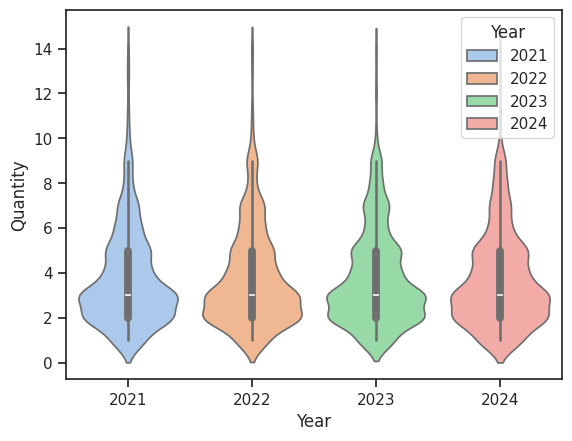

In [ ]:
# Violin plots of quantity by year

sns.violinplot(x = "Year", y = "Quantity", data = df_total, hue = "Year", palette = "pastel")

plt.show()

<Axes: >

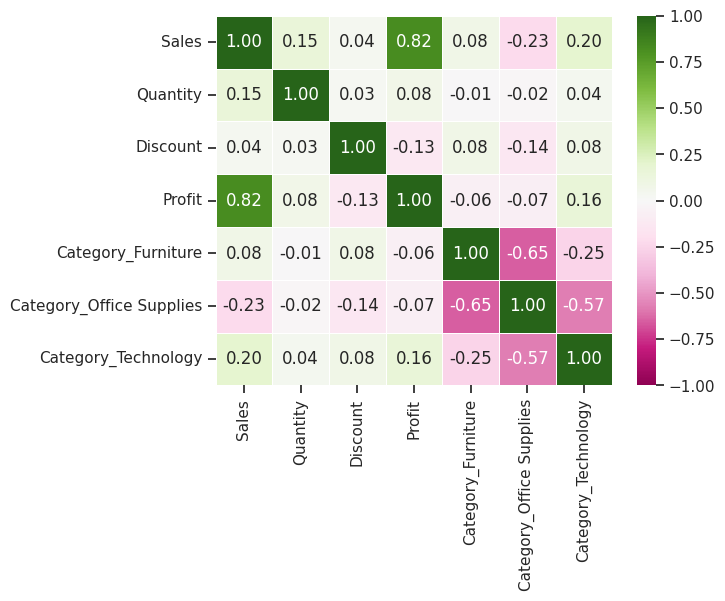

In [ ]:
# Creating a correlation matrix of the variables in our data set to see how strongly they influence each other
df_total_corr = pd.get_dummies(df_total, columns = ['Category'])
df_total_corr

df_R3 = df_total_corr[(df_total_corr['Segment'] == 'Consumer') & (df_total_corr['Region'] == 3)]
df_R3

selected_cols = ['Sales', 'Quantity', 'Discount', 'Profit',
                 'Category_Furniture', 'Category_Office Supplies',
                 'Category_Technology']

correlation_matrix = df_R3[selected_cols].corr()

sns.heatmap(correlation_matrix, annot = True, linewidth = .5, fmt = ".2f", cmap = "PiYG", vmin = -1, vmax = 1)

As we can see from our data analysis so far, there might be some problems with our data set. The initial bar graph seems to suggest that profits skyrocketed in 2023, but this may be caused by the high number of outliers during that year and 2024 as evidenced by our boxplots and pairplots. Additionally, it appears that there is no correlation between discount and profit which is a bit strange.

So far, we've only been working with the raw data. Given that we've picked up some irregularities in the data, (specifically with some profit values being somehow larger than the sales) let's clean and take some of the outliers out of our data and look at how our visuals might change.

I'm going to remove any sales greater than 2000 and any profits that are not within -200 and 200. Based on our visuals so far, this seems to be where the vast majority of our data lies and we shouldn't be getting rid of too much of our data.

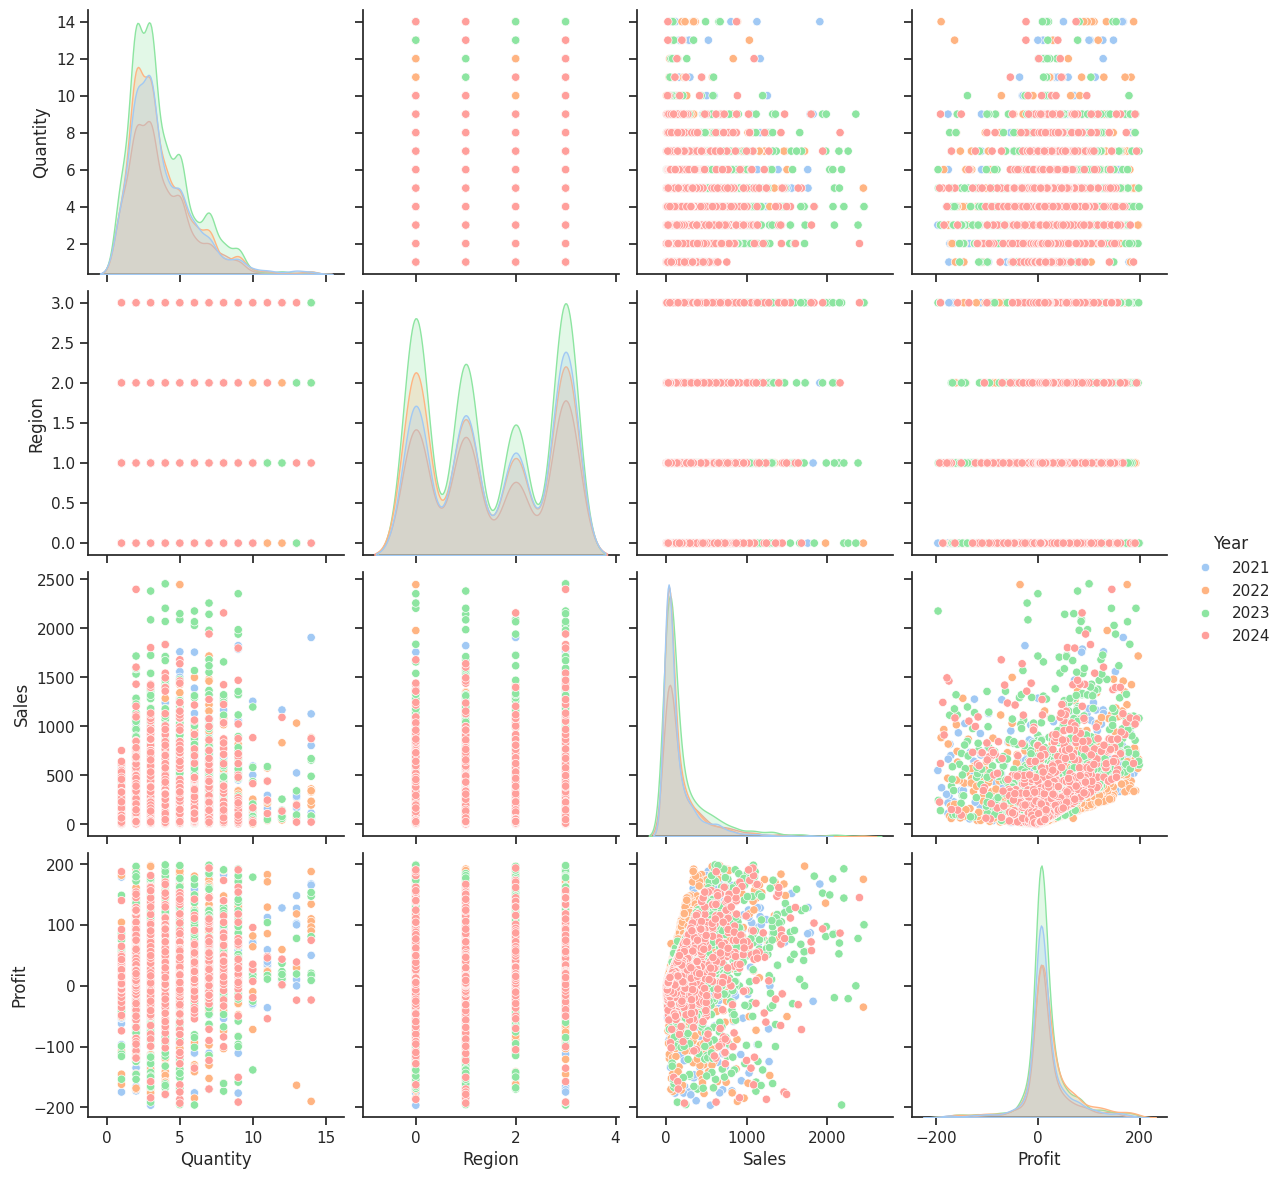

In [ ]:
# Creating my clean data set and going back through some of my previous visuals to check that they look better
df_total_clean = df_total[(df_total['Sales']<2000)&(df_total['Profit']<200)&(df_total['Profit']>-200)]

cols_for_pairplot = ["Quantity", "Region", "Sales", "Profit", "Year"]

df_pairplot = df_total_clean[cols_for_pairplot]

sns.pairplot(df_pairplot, vars = df_pairplot.columns[:-1], hue = "Year",  height = 3, palette = "pastel")
plt.show()

These graphs now look much cleaner, all our data seems spread fairly evenly and it appears that we've successfully removed the outliers that were skewing our initial data.

<ipython-input-111-64bb383d02bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_clean['Year'] = df_total_clean['Order Date'].dt.year


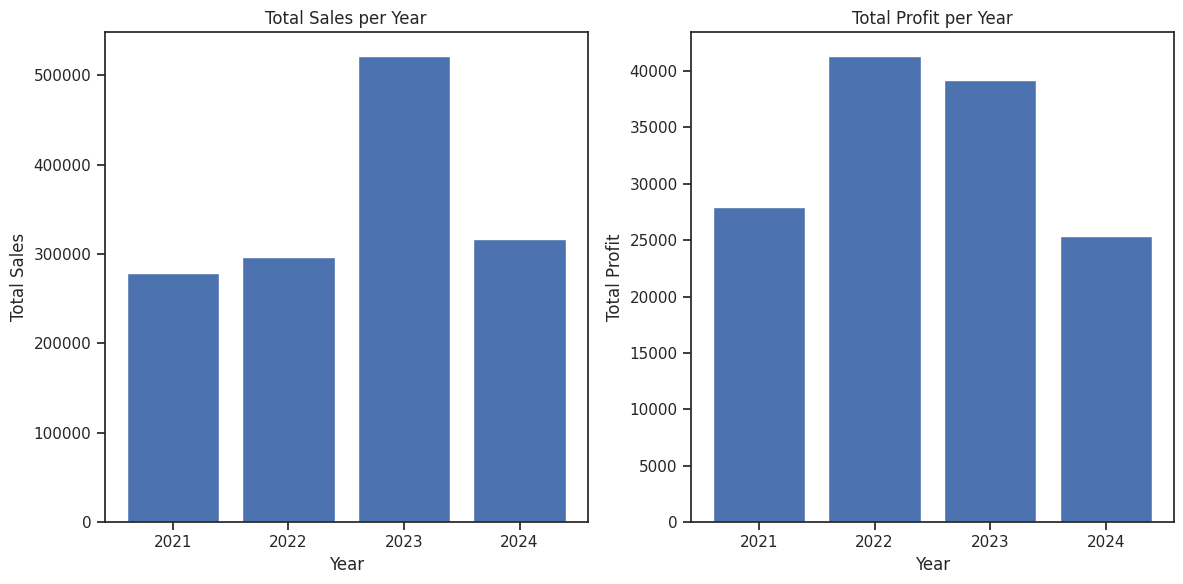

In [ ]:
df_total_clean['Year'] = df_total_clean['Order Date'].dt.year
sales_by_year = df_total_clean.groupby('Year')['Sales'].sum()
profit_by_year = df_total_clean.groupby('Year')['Profit'].sum()


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot total sales
axes[0].bar(sales_by_year.index.astype(str), sales_by_year.values)
axes[0].set_title('Total Sales per Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Total Sales')

# Plot total profit
axes[1].bar(profit_by_year.index.astype(str), profit_by_year.values)
axes[1].set_title('Total Profit per Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Total Profit')

plt.tight_layout()
plt.show()

As we can see clearly now, while total sales are indeed up in 2023, profits actually decreased from the previous year when accounting for these outliers. Let's now create some boxplots to further contextualize this.

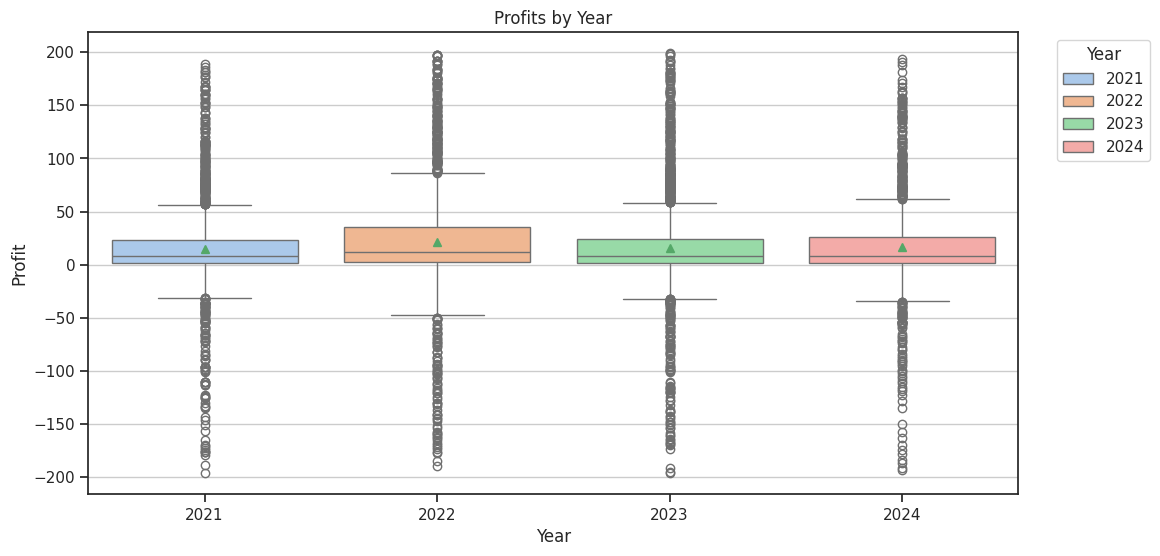

In [ ]:
plt.figure(figsize = (12,6))
sns.boxplot(x = "Year", y = "Profit", data = df_total_clean, hue = "Year", palette = "pastel",
            showmeans = True)


#Customization of Chart

plt.title('Profits by Year')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.grid(axis = 'y', linestyle = '-')
plt.legend(title = 'Year', bbox_to_anchor = (1.15,1), loc = 'upper right')

plt.show()

**Question 1**

Based on my analysis thus far, it appears that there is no real difference between before and after 2023 when it comes to total profits. While sales did increase due to volume of the units sold, the introduction of the new system did not increase profits. This is mostly according to our adjusted bar graphs and box plots after the data cleaning process.


<ipython-input-133-65ee723b7fa3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_clean['Profit Margin'] = (df_total_clean['Profit']/df_total_clean['Sales']).round(2)


<Axes: xlabel='Year', ylabel='Profit Margin'>

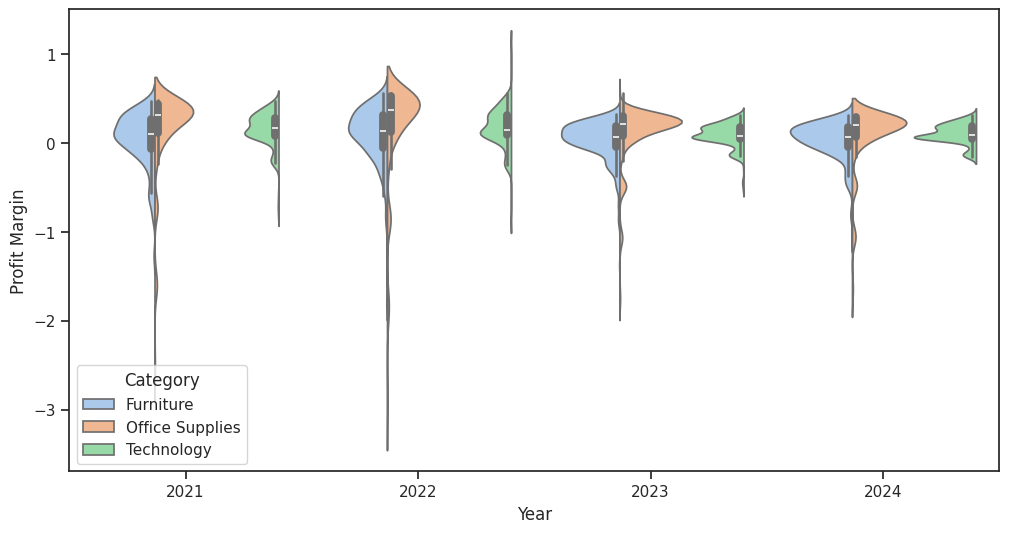

In [ ]:
# Creating a profit margin column in our cleaned data set to see profit differences between categories
df_total_clean['Profit Margin'] = (df_total_clean['Profit']/df_total_clean['Sales']).round(2)

plt.figure(figsize = (12,6))
sns.violinplot(x = "Year", y = "Profit Margin", data = df_total_clean, hue = "Category", palette = "pastel", split = True)


I created this graph to get an idea of how the different categories compare to each other in terms of profits over time. This will be helpful for answering the second and third questions, as well as potentially providing some context for the first. Let's create a few more visuals that help us understand the relationships between categories and profits/sales over time. These graphs will help us to answer both questions 2 and 3.

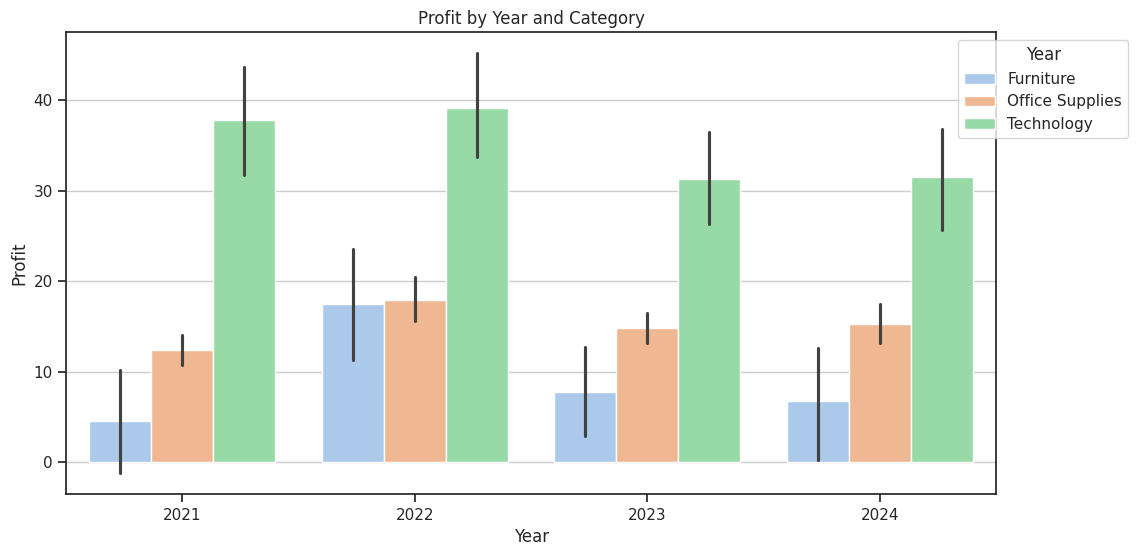

In [ ]:
# Bar graphs for yearly profits by category
plt.figure(figsize = (12,6))
sns.barplot(x = "Year", y = "Profit", data = df_total_clean, hue = "Category", palette = "pastel")

plt.title('Profit by Year and Category')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.grid(axis = 'y', linestyle = '-')
plt.legend(title = 'Year', bbox_to_anchor = (1.15,1), loc = 'upper right')

plt.show()

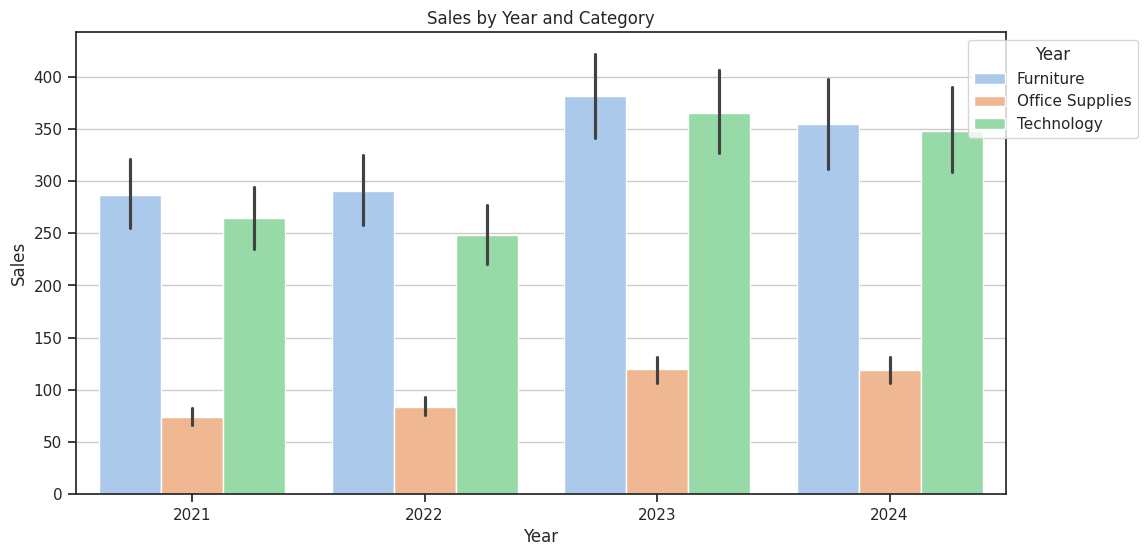

In [ ]:
# Bar graphs for yearly sales by category
plt.figure(figsize = (12,6))
sns.barplot(x = "Year", y = "Sales", data = df_total_clean, hue = "Category", palette = "pastel")

plt.title('Sales by Year and Category')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(axis = 'y', linestyle = '-')
plt.legend(title = 'Year', bbox_to_anchor = (1.15,1), loc = 'upper right')

plt.show()

**Question 2**

Based on these graphs, it appears that while sales for technology do increase in 2023, total profits actually decrease. This is further contextualized by our violin graph, which shows that the profit margin for technology does decrease in 2023 if you look closely. Technology does create the most total profit out of the 3 categories but furniture passes it in total sales in 2023, so the answer to this question is no.


**Question 3**

Fortunately, we can use this same group of visuals to answer this question. While office supplies do have the lowest number of total sales, we can see from our violin plot that they do have the highest profit margin. Because sales numbers are low, their total profit is lower than the other categories but per unit, office supplies are the most profitable product category. Technology has the highest total profit values for all categories.

**Additional Questions**

1. What were the total sales generated over the course of the 2024 year?

In [ ]:
tot = df_24['Sales'].sum()
print(f'Total revenue generated in 2024: ${tot:.2f}')

Total revenue generated in 2024: $625177.76


$625177.76

2. Which product had the highest profit and how much profit did it generate?

In [ ]:
df_total.groupby('Category')['Profit'].sum().sort_values(ascending = False)

,Profit
Category,
Technology,264008.05
Office Supplies,119320.91
Furniture,19294.97


Technology had the highest profit with a total of $264008.05

3. What was the average price of all products sold by the company?

In [ ]:
df_total['Price'] = df_total['Sales']/df_total['Quantity']
df_total['Price'].mean()

84.16935231278502

$84.17

4. What was the total quantity of products sold by the company?

In [ ]:
df_total['Quantity'].sum()

31467

31467

5. Which category had the highest revenue and how much revenue did it generate?

In [ ]:
df_total.groupby('Category')['Sales'].sum().sort_values(ascending = False)

,Sales
Category,
Technology,993674.66
Furniture,829638.65
Office Supplies,812410.43


The category with the highest revenue was technology, with $993674.66 total revenue.

6. What was the average revenue per sale?

In [ ]:
df_total['Sales'].mean()

317.4041112716763

$317.40 was the average revenue per sale.

7. What was the total revenue generated in each quarter of the year? (i.e. Q1, Q2, Q3, Q4)

In [ ]:
df_total['Quarter'] = df_total['Order Date'].dt.quarter
df_total.groupby('Quarter')['Sales'].sum()

,Sales
Quarter,
1,529569.38
2,665210.75
3,707691.45
4,733252.16


The first quarter total was $529569.38

The second quarter total was $665210.75

The third quarter total was $707691.45

The fourth quarter total was $733252.16